In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">Decomposition Methods</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Why Decompositions?</h2>

# Statements

- Consider the following statements:
  - "*In February 1989 7,477,400 people were employed but in Febrary 1993 7,448,500 people were employed. The Labor market was roughly as strong in 1993 as it was in 1989.*"
  - "*In December, 2019, employment in Australia rose by 125,300 people meaning the economy was strong. But in January, 2020 employment fell by 226,400 meaning that the economy weakened.*"
  - "*Between October, 2021 and November, 2021, the number of employed people went up by 398,000 meaning that at this time many jobs were being created.*"
- What is wrong with these statements?
  

# Data

- Employed persons aged 15-64 in Australia at a monthly frequency.
- Unemployment rate also there (we will use it later).

In [2]:
import pandas as pd
emp=pd.read_csv('employment.csv')
print(emp.head())
emp['Time'] = pd.to_datetime(emp['Time'],format = "%b-%Y")

       Time  Employed  UnemploymentRate
0  Feb-1978    5892.7               7.5
1  Mar-1978    5945.8               6.6
2  Apr-1978    5958.8               6.3
3  May-1978    5949.3               6.3
4  Jun-1978    5941.3               6.2


# Employment data

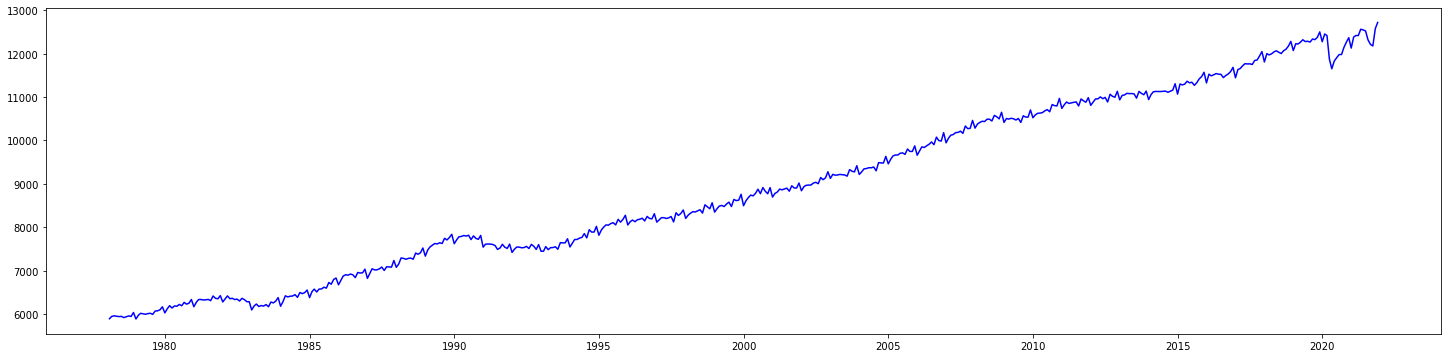

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(emp.Time, emp.Employed, color='blue')

# Employment data (last 6 years)

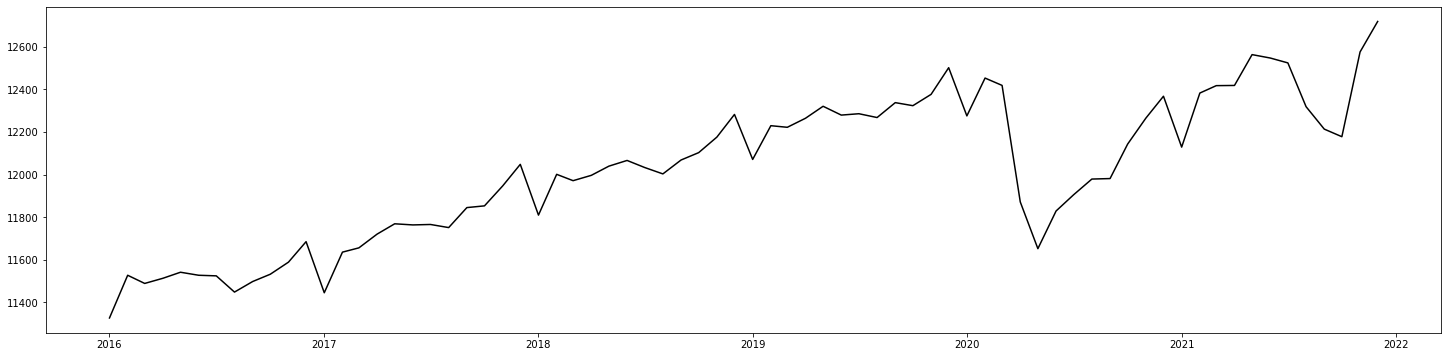

In [4]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(emp.Time[-72:], emp.Employed[-72:], color='black')

# Decomposition

- We can think of four things that may affect time series
  - **Trend (T):** a tendency for a time series to rise or fall (e.g. life expectancy)
  - **Cycles (C):** a tendency for a time series pattern to repeat itself but at *irregular* intervals (e.g. business cycles)
  - **Seasonality (S):** a tendency for a time series pattern to repeat over *regular* intervals, (e.g. temperature)
  - **Remainder (R):** idiosyncratic components (e.g. covid)
- Cycle is often included in trend.

<h2 style = "fontsize:300%;text-align:center;">Additive v Multiplicative Decompositions</h2>

# Decompositions

Additive decomposition:

$$Y_t=T_t+S_t+R_t$$

Multiplicative decomposition:

$$Y_t=T_t\times S_t\times R_t$$

Let's 'simulate' both of these

# Simulation
- Trend will be a linear trend
- Seasonal component will be a sine function
- Remainder will just be some random uniform noise

In [5]:
import numpy as np
time = np.arange(1,241)
trend = 0.2*time
seasonal = np.sin(np.pi*time/6)+2
remainder = np.random.uniform(1,2,240)

# Components

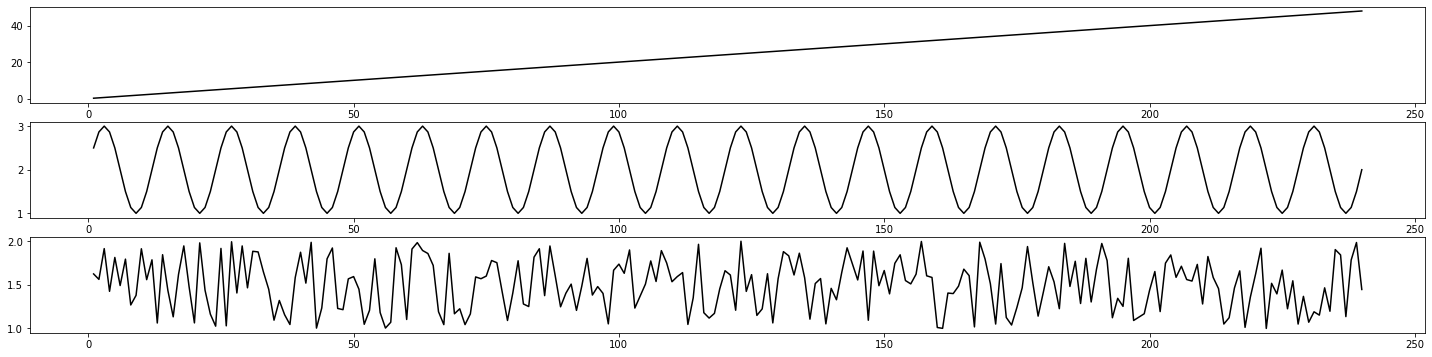

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(25, 6))
ax1.plot(time, trend, color = 'black')
ax2.plot(time, seasonal, color = 'black')
ax3.plot(time, remainder, color = 'black')

# Additive

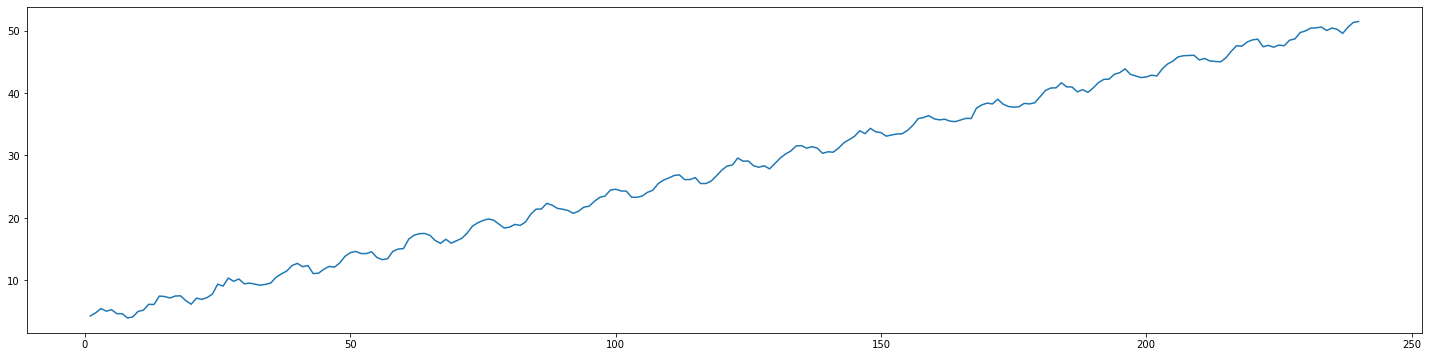

In [7]:
y_add = trend+seasonal+remainder
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(time,y_add)

# Multiplicative

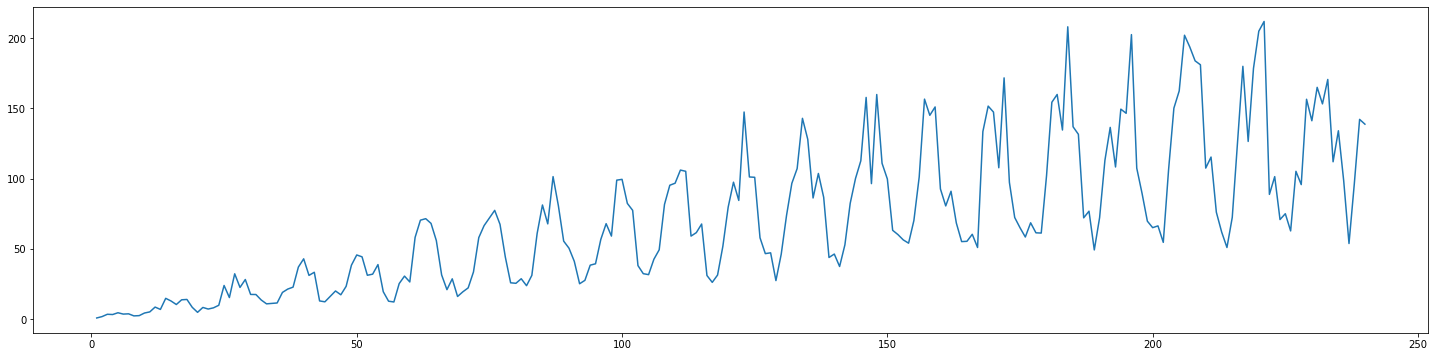

In [8]:
y_mult = trend*seasonal*remainder
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(time,y_mult)

# Comments

- For an additive decomposition with an upwards trend:
  - The seasonality does not become exaggerated over time
  - The variance stays mostly constant
- For a multiplicative decomposition with an upwards trend
  - The seasonal pattern becomes more exaggerated over time
  - The variance also increases (the line plot "flares out")

# Log Transformation

The additive and multplicative decompositions are linked by taking a log transformation. Consider:

$$Y_t=T_t\times S_t\times R_t$$

Taking the logarithm of both sides 

$$log(Y_t)=log(T_t)+ log(S_t)+ log(R_t)$$

For this to work, all components must be non-negative

# Multiplicative data

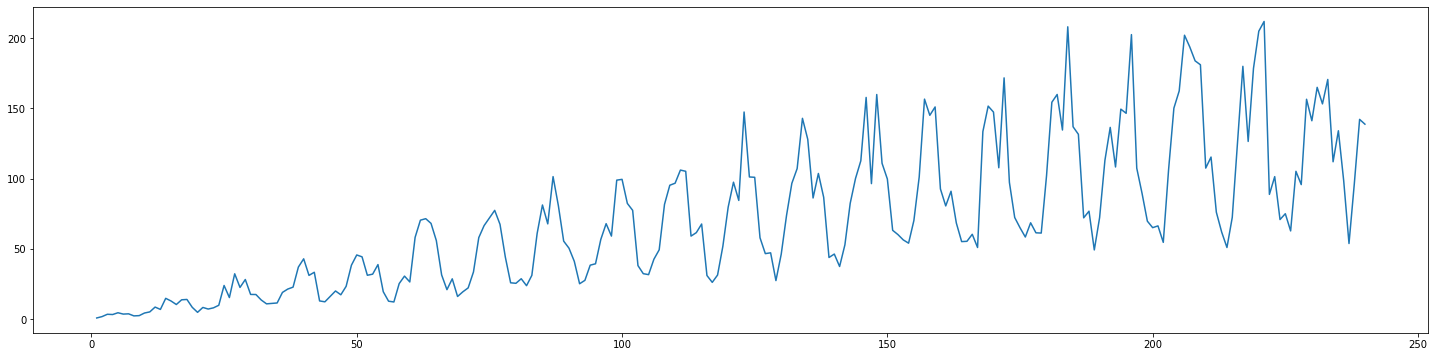

In [9]:
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(time,y_mult)

# Multiplicative data (log scale)

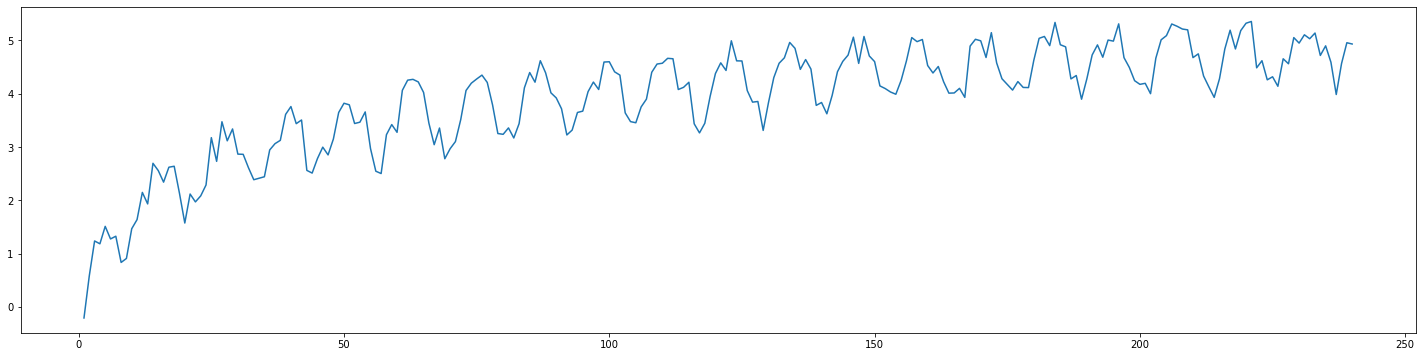

In [10]:
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(time,np.log(y_mult))

# Log transformation

- The log transformation is generally useful when:
  - To reduce fluctuation in the seasonal pattern of data.
  - To stabilise the variance of time series.
  - To reduce the impact of outliers
- Once we get to forecasting, any additive model can be made into a multiplicative model simply by taking the log transformation.

**Your Turn:** Discuss whether to use an additive or multiplicative decomposition below.

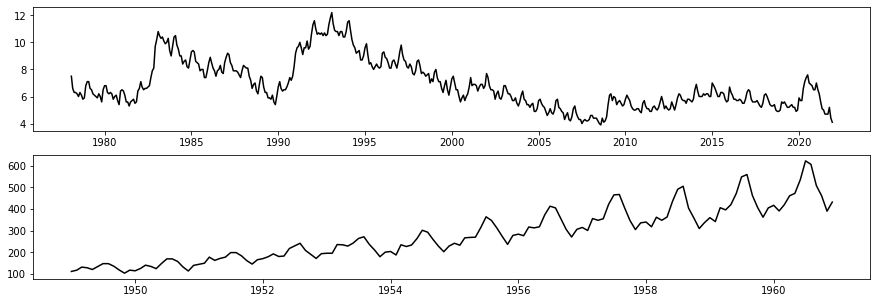

In [11]:
air=pd.read_csv('AirPassengers.csv')
air['Month'] = pd.to_datetime(air['Month'],format = "%Y-%m")
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 5))
ax1.plot(emp.Time, emp.UnemploymentRate, color='black')
ax2.plot(air.Month, air.Passengers, color='black')

<h2 style = "fontsize:300%;text-align:center;">Classical Decomposition</h2>

# Classical Decomposition

- The classical decomposition was developed in the 1920s.
- It has since been superseeded by more sophisticated methods.
- More modern methods build upon the classical decomposition so it is worth covering in detail.
- We will implement more modern methods but not cover all the algorithmic details.

# Moving average

- The basic idea: trend-cycle components should be smooth.
- One way to smooth a series is to take an order $m$ moving average

$$T_t = \frac{1}{m}\sum_{j=-k}^{k}Y_{t+j}\quad\textrm{where }m=2k+1$$

- This is slightly different to the moving average model you have seen last year

# Moving average in Python

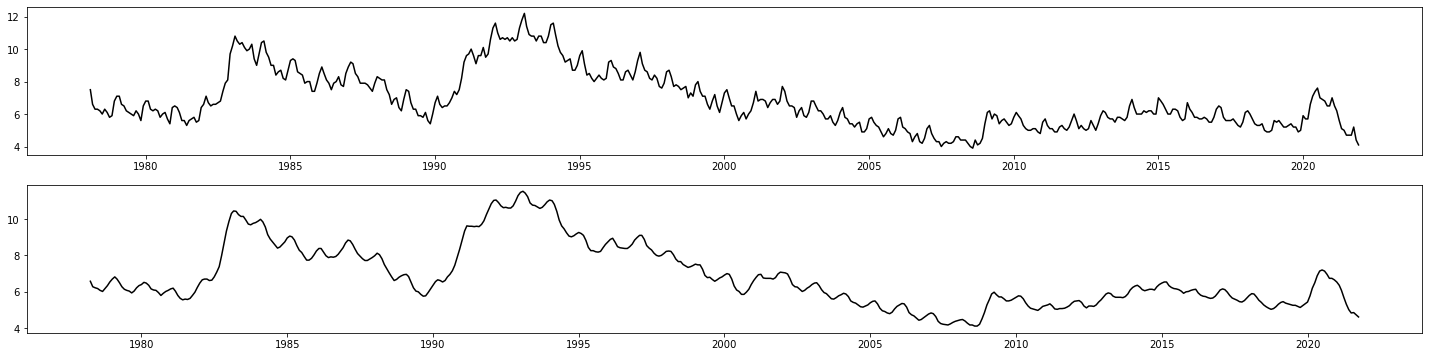

In [12]:
emp['Unemp5MA'] = emp['UnemploymentRate'].rolling(window=5, center = True).mean()
fig, (ax1,ax2) = plt.subplots(2,figsize=(25, 6))
ax1.plot(emp.Time, emp.UnemploymentRate, color='black')
ax2.plot(emp.Time, emp.Unemp5MA, color='black')

# Double moving average

We can smooth more by taking a moving average again

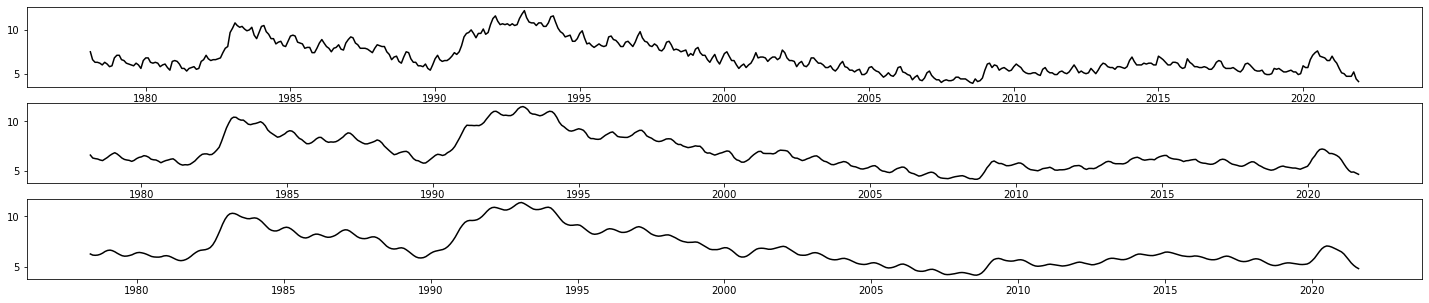

In [13]:
emp['Unemp5x5MA'] = emp['Unemp5MA'].rolling(window=5, center = True).mean()
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(25, 5))
ax1.plot(emp.Time, emp.UnemploymentRate, color='black')
ax2.plot(emp.Time, emp.Unemp5MA, color='black')
ax3.plot(emp.Time, emp.Unemp5x5MA, color='black')

# Backshift notation

- To better understand what double MA achieves it is best to use the lag or backshift operator $L$ (sometimes people use $B$).
  - $LY_t=Y_{t-1}$
  - $L^2Y_t=Y_{t-2}$
  - $L^kY_t=Y_{t-k}$
  - $L^{-1}Y_t=Y_{t+1}$
  - $L^{-k}Y_t=Y_{t+k}$
- Let's write the moving averages in terms of the backshift operator

# An order 3 MA

A order 3 MA is given by

$$\begin{aligned}Z_t = &\frac{1}{3}\left(Y_{t-1}+Y_t+Y_{t+1}\right)\\=&\frac{1}{3}\left(LY_t+Y_t+L^{-1}Y_t\right)\\=&\frac{1}{3}(L+1+L^{-1})Y_t\end{aligned}$$

# An 3x3 MA

Applying an order 3 MA twice gives

$$\begin{aligned}W_t = &\left(\frac{1}{3}\right)^2(L+1+L^{-1})(L+1+L^{-1})Y_t\\=&\frac{1}{9}(L^2+L+1+L+1+L^{-1}+1+L^{-1}+L^{-2})Y_t\\=&\frac{1}{9}(L^2+2L+3+2L^{-1}+L^{-2})Y_t\\=&\frac{1}{9}Y_{t-2}+\frac{2}{9}Y_{t-1}+\frac{3}{9}Y_{t}+\frac{2}{9}Y_{t+1}+\frac{1}{9}Y_{t+2}&\end{aligned}$$

The terms towards the edges have a slightly lower weight.

# Even MA order

- Even MA order, can be defined two ways. An MA of order 4 can either be:

$$Z_t=\frac{1}{4}(L^2+L^1+1+L^{-1})Y_t\quad\textrm{or}\quad Z_t=\frac{1}{4}
(L^1+1+L^{-1}+L^{-2})Y_t$$

- For double moving average (with both orders even) it makes no difference as long as one MA uses more observations from the past and the other uses more from the future. For a 2x4 MA

$$\begin{aligned}Z_t=\frac{1}{16}&(1+L^{-1})(L^2+L^1+1+L^{-1})Y_t\\=\frac{1}{16}&(1+L)(L^1+1+L^{-1}+L^{-2})Y_t\end{aligned}$$

- Your turn: Show this is true...


# A 2x12 MA in Python

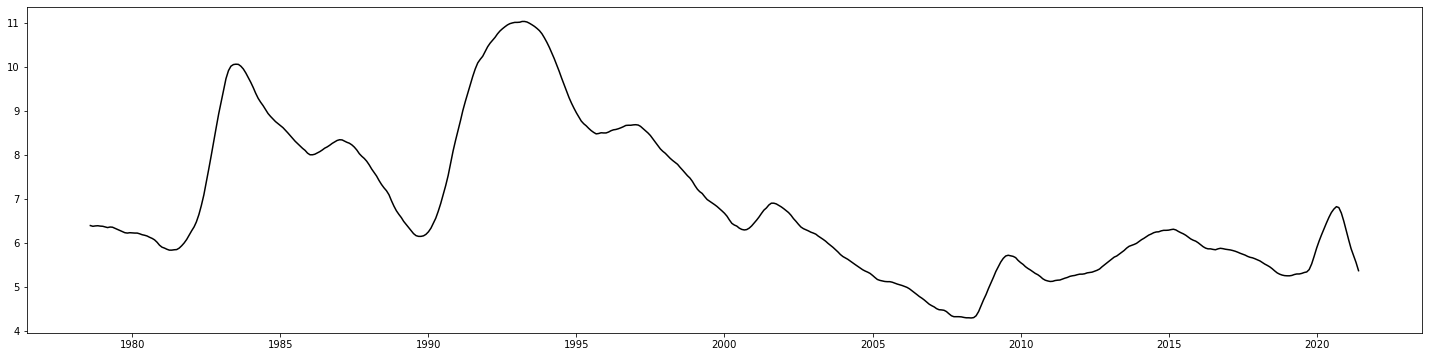

In [14]:
from pandas.api.indexers import FixedForwardWindowIndexer
indexer = FixedForwardWindowIndexer(window_size=2)
emp['Unemp12MA'] = emp['UnemploymentRate'].rolling(window=12, center = True).mean()
emp['Unemp2x12MA'] = emp['Unemp12MA'].rolling(indexer).mean()
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(emp.Time, emp.Unemp2x12MA, color='black')

# Classical decomposition

- The first step of the classical decomposition (for montly data) is to find a trend-cycle estimate as a $2\times12$ MA.

$$T_t=(1+L^{-1})(L^6+L^5+\dots+L+1+L^{-1}+\dots+L^{-4}+L^{-5})Y_t$$

- This is subtracted from the series for an additive decomposition to get an initial estimate of detrended data. For a multiplicative decomposition divide.

$$S_t+R_t=Y_t-T_t\quad\textrm{or}\quad S_t\times R_t=Y_t/T_t$$

- Lets see what this looks like


# De-trended Series

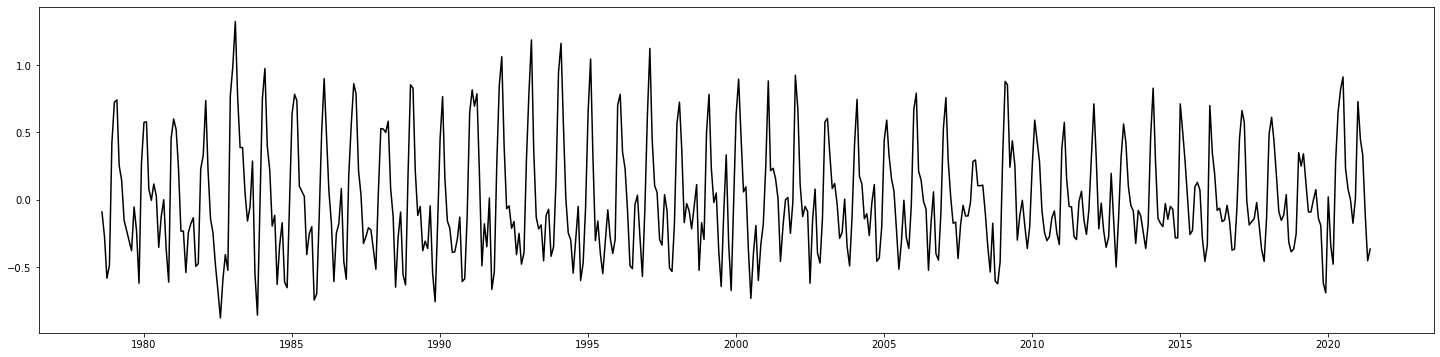

In [15]:
emp['Detrended']=emp['UnemploymentRate']-emp['Unemp2x12MA'] 
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(emp.Time, emp.Detrended, color='black')

# Deseasonalise data

- To deseasonalise we take monthly averages
  - Take average using observations in January only
  - Take average using observations in February only
  -...
  - Take average using observations in December only
- The averages are then repeated over and over
$$\dots,S_{\textrm{Jan}},S_{\textrm{Feb}},\dots,S_{\textrm{Dec}},\dots,S_{\textrm{Jan}},S_{\textrm{Feb}},\dots,S_{\textrm{Dec}},\dots,S_{\textrm{Jan}},S_{\textrm{Feb}},\dots,S_{\textrm{Dec}},\dots$$


# In Python

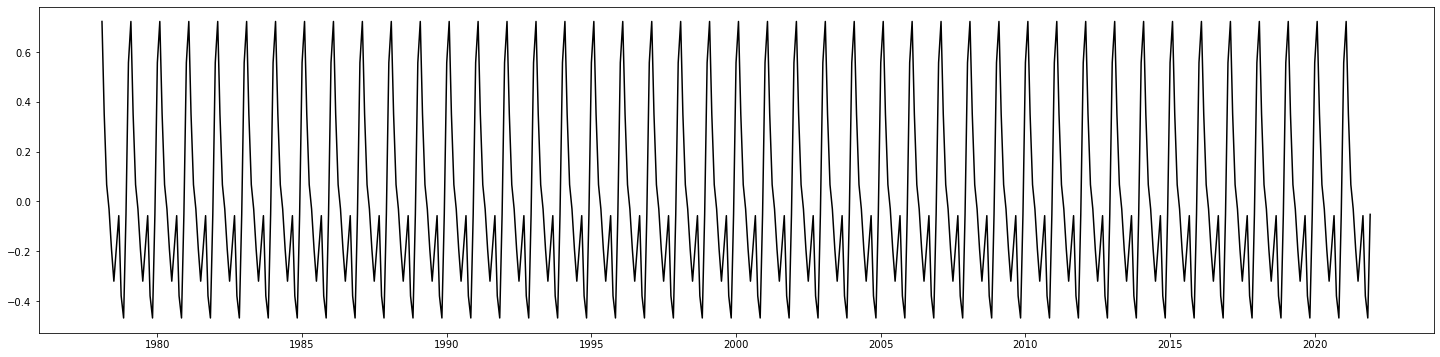

In [16]:
emp['Month'] = pd.DatetimeIndex(emp['Time']).month
seas = emp.groupby(by = [emp.Month]).mean()
emp = emp.merge(seas['Detrended'], how = 'left',left_on='Month', right_on='Month')
emp = emp.rename(columns = {"Detrended_x":"Detrended", "Detrended_y":"Seasonal"})
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(emp.Time, emp.Seasonal, color='black')



# Remainder

- The seasonal terms can be subtracted to obtain the remainder

$$R_t=Y_t-T_t-S_t$$

- For a multiplicative model divide to obtain the remainder

$$R_t=Y_t/(T_t \times S_t)$$

# Additive Decomposition

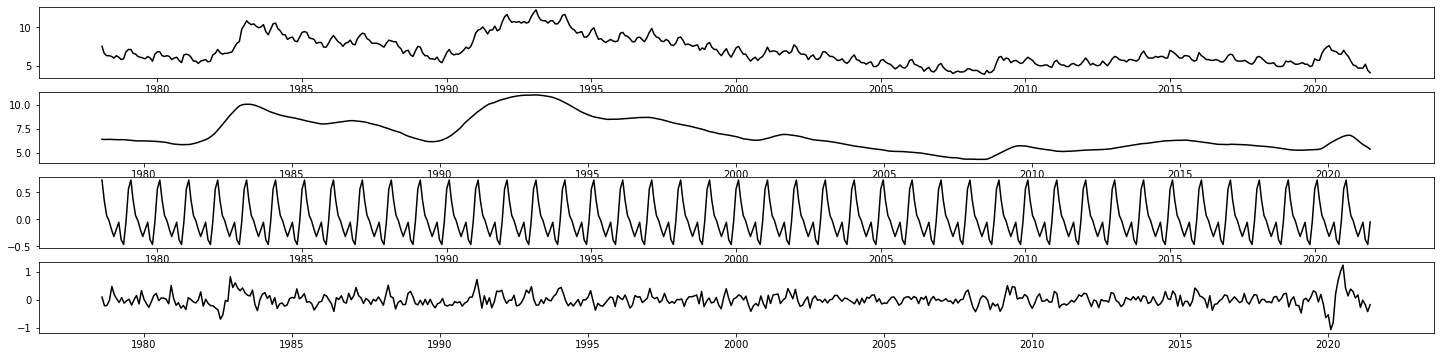

In [17]:
emp['Remainder'] = emp['UnemploymentRate'] - emp['Unemp2x12MA'] - emp['Seasonal'] 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(25, 6))
ax1.plot(emp.Time, emp.UnemploymentRate, color='black')
ax2.plot(emp.Time, emp.Unemp2x12MA, color='black')
ax3.plot(emp.Time, emp.Seasonal, color='black')
ax4.plot(emp.Time, emp.Remainder, color='black')

# Your turn

Carry out a multiplicative decomposition on the number of employed people data

In [18]:
emp_md = emp[['Time','Employed']]
emp_md['Emp12MA'] = emp_md['Employed'].rolling(window=12, center = True).mean()
emp_md['Trend'] = emp_md['Emp12MA'].rolling(indexer).mean()
emp_md['Detrended'] = emp_md['Employed']/emp_md['Trend']
emp_md['Month'] = pd.DatetimeIndex(emp_md['Time']).month
seas_md = emp_md.groupby(by = [emp_md.Month]).mean()
emp_md = emp_md.merge(seas_md['Detrended'], how = 'left',left_on='Month', right_on='Month')
emp_md = emp_md.rename(columns = {"Detrended_x":"Detrended", "Detrended_y":"Seasonal"})
emp_md['Remainder'] = emp_md['Employed'] / (emp_md['Trend'] - emp_md['Seasonal']) 


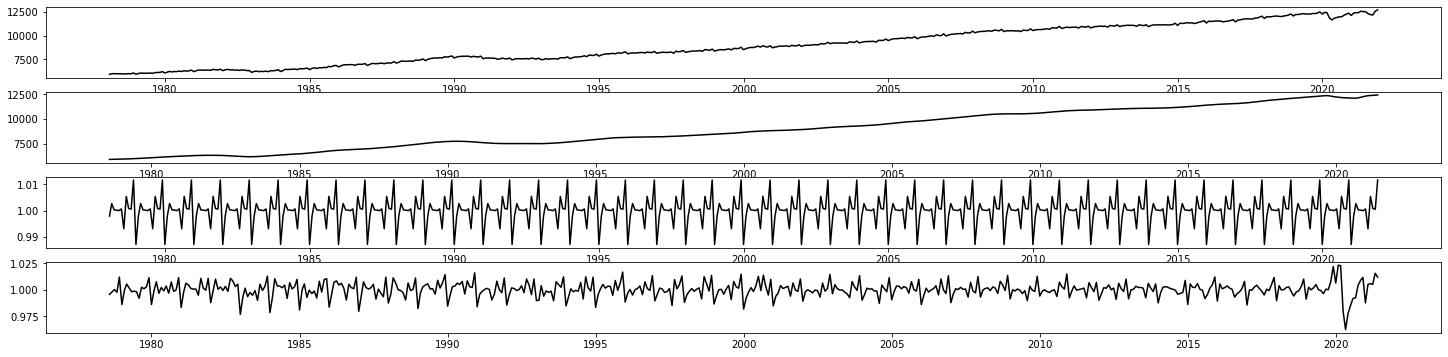

In [19]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(25, 6))
ax1.plot(emp_md.Time, emp_md.Employed, color='black')
ax2.plot(emp_md.Time, emp_md.Trend, color='black')
ax3.plot(emp_md.Time, emp_md.Seasonal, color='black')
ax4.plot(emp_md.Time, emp_md.Remainder, color='black')


<h2 style = "fontsize:300%;text-align:center;">Modern Decompositions</h2>

# Shortcomings of Classical Decomposition

- The estimate of the trend-cycle is unavailable for the first few and last few observations.
  - This makes it particularly poorly suited to forecasting
- Classical decomposition methods assume that the seasonal component repeats from year to year. 
- Not robust to outliers/unusual values.
- More sophisticated methods address these issues

# The X-11 Decomposition

- Developed by U.S. Census Bureau and Statistics Canada in the 1960s
- Full details available in Bleikh and Yong (2014) [link to google books](https://books.google.com.au/books?id=WfefCwAAQBAJ&pg=PP66&lpg=PP66&dq=The+X11+method&source=bl&ots=H_q3UTyeSH&sig=mv9clb6sIUqbNzzWk69X6pbBKxI&hl=en&sa=X&ved=0ahUKEwi4xP-gsrDLAhWIHpQKHRO3Chc4ChDoAQgaMAA#v=onepage&q=The%20X11%20method&f=false).
- Both moving averages and seasonal averages are used as part of this method

# The X-13ARIMA-SEATS Decomposition

- Originally developed by the Bank of Spain.
- Further refined by the U.S. Census Bureau.
- Full details can be found [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj856PL6oD2AhUXTmwGHQUoDvIQFnoECA8QAQ&url=https%3A%2F%2Fwww2.census.gov%2Fsoftware%2Fx-13arima-seats%2Fx-13-data%2Fdocumentation%2Fdocx13as.pdf&usg=AOvVaw385snIwnsI6NI2vu31-P7I) (note this is a 300-page document).
- This algorithm uses seasonal ARIMA modelling which we will cover in a few weeks.
- Both X11 and X-13ARIMA-SEATS are implemented in a Python package you will use in tutorials.

# The STL Decomposition

- The **S**easonal-**T**rend decomposition based on **L**oess(STL) has some advantages.
  - Unlike X-11 and X-13ARIMA-SEATS STL works for data with any seasonal period, not just monthly or quarterly data.
  - It can also handle missing values
- It is based on Loess, a non-parametric smoothing technique.
- The full details can be found in the original paper by [Cleveland et. al., 1990](http://bit.ly/stl1990)


# Wrap-up

- Be aware of:
  - The importance of seasonally-adjusting data in certain applications.
  - The difference between multiplicative and additive decompositions and their relationship to the log transform.
  - The use of moving averages to smooth time series data.
  - The importance of seasonal effects that can gradually change over time.
- In your tutorial you will play with the more advanced decomposition methods.